In [2]:
# Pima Indians Diabetes Prediction - End-to-End Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)
print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Exploratory Data Analysis (EDA)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunctio

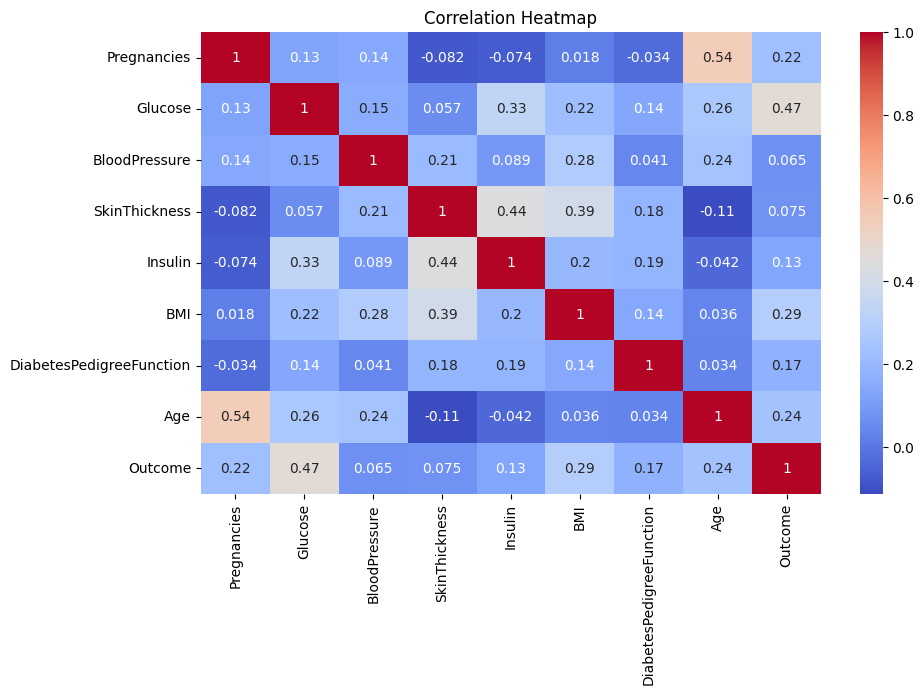

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

insight: glucose ,bmi and Age are more correlated to outcome

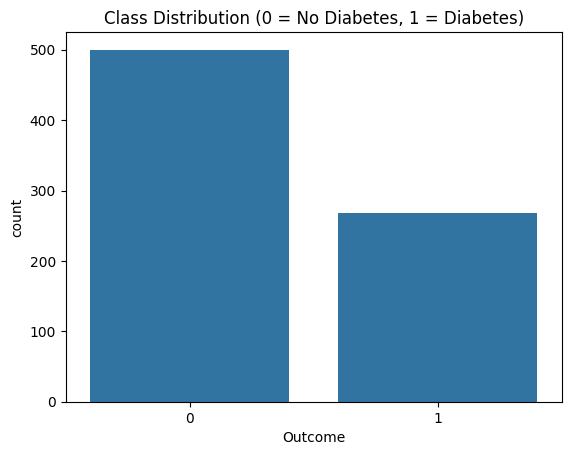

In [6]:
# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

In [7]:
#  Handle Missing / Invalid Values
# ---------------------------------------------------------
# Replace zeros in certain columns with NaN (not realistic)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill missing values with column median
df.fillna(df.median(), inplace=True)

print("Missing/Invalid values handled")


Missing/Invalid values handled


In [8]:
# Split Dataset
# ---------------------------------------------------------
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (614, 8)
Test shape: (154, 8)


In [9]:
#  Feature Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#  Train Models
# ---------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print("-" * 30)


Logistic Regression Metrics:
  Accuracy : 0.7532
  Precision: 0.6667
  Recall   : 0.6182
  F1 Score : 0.6415
------------------------------
Random Forest Metrics:
  Accuracy : 0.7338
  Precision: 0.6250
  Recall   : 0.6364
  F1 Score : 0.6306
------------------------------
SVM Metrics:
  Accuracy : 0.7468
  Precision: 0.6667
  Recall   : 0.5818
  F1 Score : 0.6214
------------------------------



 Best Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



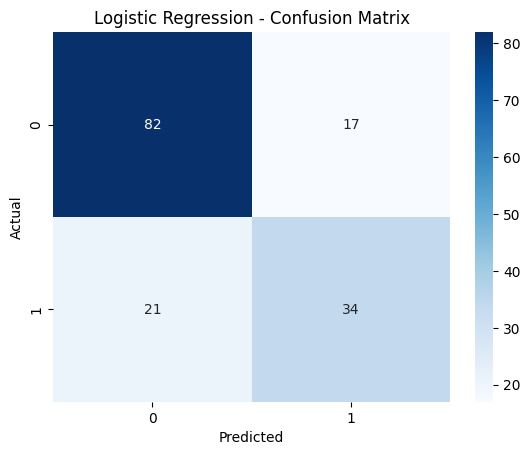

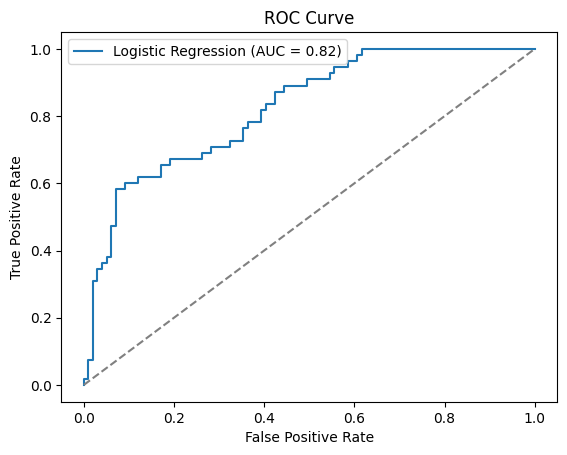

In [12]:
# Best Model Evaluation
# ---------------------------------------------------------
best_model_name = max(results, key=lambda name: results[name]['Accuracy'])
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name}")

y_pred = best_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
# Check if the best model has predict_proba before calling it
if hasattr(best_model, 'predict_proba'):
    y_prob = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve')
    plt.show()
else:
    print(f"Model {best_model_name} does not support predict_proba for ROC curve.")

In [13]:
# Hyperparameter Tuning (Example: Random Forest)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_*100)


Best Params: {'max_depth': 10, 'n_estimators': 50}
Best Accuracy: 78.17551410808225


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define valid parameter combinations
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga', 'newton-cg', 'liblinear'], 'max_iter': [100, 200]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [200]}
]

# Initialize model
log_reg = LogisticRegression(random_state=42)

# Grid search
grid = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print(" Best Params:", grid.best_params_)
print(" Best Accuracy:", grid.best_score_*100)


 Best Params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
 Best Accuracy: 77.52032520325204


In [15]:
8#Save Model
# ---------------------------------------------------------
joblib.dump(best_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler Saved Successfully!")

✅ Model and Scaler Saved Successfully!


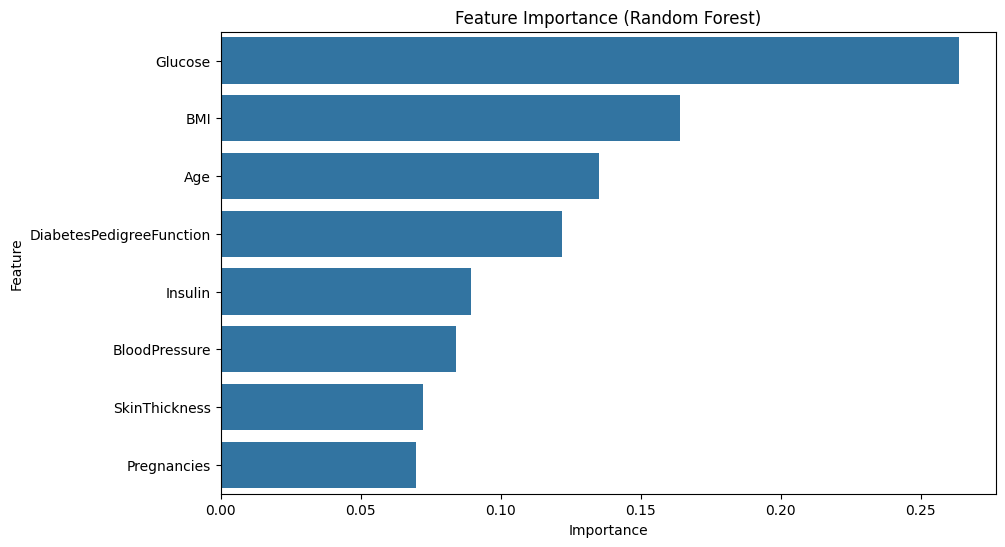

In [16]:
# Calculate and visualize feature importance using the trained Random Forest model
feature_importances = models["Random Forest"].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

features in the dataset have the most influence or predictive power in determining the Outcome are Glucose,BMI,Age

In [17]:
#Predict on New Data
# ---------------------------------------------------------
sample = np.array([[2, 120, 70, 25, 100, 28.0, 0.35, 29]])
sample_scaled = scaler.transform(sample)
prediction = best_model.predict(sample_scaled)
print("\nSample Prediction:", "Diabetic" if prediction[0]==1 else "Not Diabetic")


Sample Prediction: Not Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
prediction

array([0])

In [19]:
[6,148,72,35,0,33.6,0.627,50]

[6, 148, 72, 35, 0, 33.6, 0.627, 50]

In [20]:
#Predict on New Data
# ---------------------------------------------------------
sample = np.array([[6,148,72,35,0,33.6,0.627,50]])
sample_scaled = scaler.transform(sample)
prediction = best_model.predict(sample_scaled)
print("\nSample Prediction:", "Diabetic" if prediction[0]==1 else "Not Diabetic")


Sample Prediction: Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
prediction

array([1])

In [22]:
columns = {'data_columns': [col.lower() for col in X.columns]}


In [23]:
len(df.columns)

9

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df1=df

In [26]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Assumption: pregnancies >3 and age>35 --High Risk
            else: low risk



In [27]:
def pregnancy_risk(row):
    if row['Pregnancies'] > 3 and row['Age'] > 35:
        return 2  # high risk
    else:
        return 0  # low risk

df1['Pregnancy_Risk'] = df1.apply(pregnancy_risk, axis=1)


In [28]:
df1['Pregnancy_Risk'].value_counts()

,count
Pregnancy_Risk,
0,553
2,215


In [29]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Risk
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,2
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


In [30]:
# Split Dataset
# ---------------------------------------------------------
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#  Feature Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
#  Train Models
# ---------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"  Accuracy : {acc*100:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print("-" * 30)


Logistic Regression Metrics:
  Accuracy : 75.9740
  Precision: 0.6800
  Recall   : 0.6182
  F1 Score : 0.6476
------------------------------
Random Forest Metrics:
  Accuracy : 74.6753
  Precision: 0.6379
  Recall   : 0.6727
  F1 Score : 0.6549
------------------------------
SVM Metrics:
  Accuracy : 74.6753
  Precision: 0.6667
  Recall   : 0.5818
  F1 Score : 0.6214
------------------------------


In [34]:
# Hyperparameter Tuning (Example: Random Forest)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_*100)


Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Accuracy: 78.50231149370317


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define valid parameter combinations
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga', 'newton-cg', 'liblinear'], 'max_iter': [100, 200]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [200]}
]

# Initialize model
log_reg = LogisticRegression(random_state=42)

# Grid search
grid = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_*100)


Best Params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 77.52032520325204


In [36]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Risk
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,2
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


Feature	Typical Range


Glucose	(70 – 200)
BloodPressure	(40 – 120)
SkinThickness	(10 – 60)
Insulin	(15 – 276)
BMI	(15 – 50)
DPF (0.1 - 2.5)


 As measurable physiological values, and in reality, they cannot be 0 for a living person.

But... in the Pima Indians dataset, you will find zeros, because they actually represent missing data, not true zero measurements.

In [37]:
 #Loop through each column and print count of zeros
for col in df.columns:
    zero_sum = (df1[col] == 0).sum()
    print(f"Sum of zeros in '{col}': {zero_sum}")

Sum of zeros in 'Pregnancies': 111
Sum of zeros in 'Glucose': 0
Sum of zeros in 'BloodPressure': 0
Sum of zeros in 'SkinThickness': 0
Sum of zeros in 'Insulin': 0
Sum of zeros in 'BMI': 0
Sum of zeros in 'DiabetesPedigreeFunction': 0
Sum of zeros in 'Age': 0
Sum of zeros in 'Outcome': 500
Sum of zeros in 'Pregnancy_Risk': 553


only pregnancies have zeros

Pregnancies can be zero in data set


minimum values of each feature in df

In [38]:
 #Loop through each column and print count of zeros
for col in df.columns:
    min_ = (df1[col]).min()
    print(f"Sum of min in '{col}': {min_}")

Sum of min in 'Pregnancies': 0
Sum of min in 'Glucose': 44.0
Sum of min in 'BloodPressure': 24.0
Sum of min in 'SkinThickness': 7.0
Sum of min in 'Insulin': 14.0
Sum of min in 'BMI': 18.2
Sum of min in 'DiabetesPedigreeFunction': 0.078
Sum of min in 'Age': 21
Sum of min in 'Outcome': 0
Sum of min in 'Pregnancy_Risk': 0


what if i replace feature of pregnancies of zeros  with  median?

In [39]:
# Replace 0s with NaN for these columns
df1["Pregnancies"] = df1["Pregnancies"].replace(0, np.nan)

# Option 1: Fill missing with median values
df1["Pregnancies"] = df1["Pregnancies"].fillna(df["Pregnancies"].median())

In [40]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Risk
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1,2
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


In [41]:
# Split Dataset
# ---------------------------------------------------------
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#  Feature Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
#  Train Models
# ---------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}



In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"  Accuracy : {acc*100:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print("-" * 30)


Logistic Regression Metrics:
  Accuracy : 76.6234
  Precision: 0.6863
  Recall   : 0.6364
  F1 Score : 0.6604
------------------------------
Random Forest Metrics:
  Accuracy : 76.6234
  Precision: 0.6557
  Recall   : 0.7273
  F1 Score : 0.6897
------------------------------
SVM Metrics:
  Accuracy : 74.0260
  Precision: 0.6531
  Recall   : 0.5818
  F1 Score : 0.6154
------------------------------


In [45]:
# Hyperparameter Tuning (Example: Random Forest)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_*100)


Best Params: {'max_depth': 8, 'n_estimators': 150}
Best Accuracy: 78.012912482066


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define valid parameter combinations
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga', 'newton-cg', 'liblinear'], 'max_iter': [100, 200]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [200]}
]

# Initialize model
log_reg = LogisticRegression(random_state=42)

# Grid search
grid = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_*100)


Best Params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 77.52032520325204


Insight:
after replacing zeros of pregnanices with median
accuracy has increased by 1%
after hyper parameter  tuning  it increased to 2% by random forest alogrithm
comparing before replacing the data of df n after replacing of data of df accuracy has decreased after hyper parameter tuning . without hyper parameter tuning the accuracy increased with replacing pregananice

In [47]:
#  Define Prediction Function
def predict_diabetes(pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, diabetespedigreefunction, age):
    try:
        # Create an array with the correct number of features (8)
        x = np.zeros(len(df.columns) -1) # Subtract 1 for the 'Outcome' column
        data_columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']
        x[data_columns.index('pregnancies')] = pregnancies
        x[data_columns.index('glucose')] = glucose
        x[data_columns.index('bloodpressure')] = bloodpressure
        x[data_columns.index('skinthickness')] = skinthickness
        x[data_columns.index('insulin')] = insulin
        x[data_columns.index('bmi')] = bmi
        x[data_columns.index('diabetespedigreefunction')] = diabetespedigreefunction  # Updated to match lowercase
        x[data_columns.index('age')] = age
        x_scaled = scaler.transform([x])
        # Assuming 'model' is the best performing model loaded previously
        # If you want to use the deep learning model, you'll need to load/define it and use dl_model.predict
        diabetes_pred = model.predict(x_scaled)[0]
        probability = model.predict_proba(x_scaled)[0][1]  # Probability of diabetes
        return f"Predicted Diabetes: {'Yes' if diabetes_pred == 1 else 'No'}\nProbability of Diabetes: {probability:.2%}"
    except ValueError as e:
        return f"Error: Invalid input values - {e}. Ensure inputs are within expected ranges (e.g., Glucose 44-199, BMI 18-67)."
    except IndexError as e:
        return f"Error: Feature mismatch - {e}. Check if all features are correctly mapped."
    except Exception as e:
        return f"Error: Prediction failed - {e}"

In [48]:
#  Create Gradio Interface
import gradio as gr
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Slider(minimum=0, maximum=17, step=1, label="Pregnancies", value=1),
        gr.Slider(minimum=44, maximum=199, step=1, label="Glucose (mg/dl)", value=100),
        gr.Slider(minimum=0, maximum=122, step=1, label="Blood Pressure (mmHg)", value=70),
        gr.Slider(minimum=0, maximum=99, step=1, label="Skin Thickness (mm)", value=20),
        gr.Slider(minimum=0, maximum=846, step=1, label="Insulin (mu U/ml)", value=80),
        gr.Slider(minimum=18, maximum=67, step=0.1, label="BMI", value=25),
        gr.Slider(minimum=0.078, maximum=2.42, step=0.01, label="Diabetes Pedigree Function", value=0.5),
        gr.Slider(minimum=21, maximum=81, step=1, label="Age", value=30)
    ],
    outputs="text",
    title="💉 Pima Indians Diabetes Predictor",
    description="Enter medical data to predict diabetes onset. Ensure inputs are within the specified ranges."
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a47fdb4b5bf4b9ccd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3490 - loss: 0.7433 - val_accuracy: 0.6911 - val_loss: 0.6813
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5858 - loss: 0.6896 - val_accuracy: 0.7073 - val_loss: 0.6585
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6719 - loss: 0.6582 - val_accuracy: 0.7317 - val_loss: 0.6029
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7109 - loss: 0.5921 - val_accuracy: 0.7398 - val_loss: 0.5312
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7840 - loss: 0.5003 - val_accuracy: 0.7561 - val_loss: 0.4804
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7419 - loss: 0.4999 - val_accuracy: 0.7724 - val_loss: 0.4748
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7530 - loss: 0.4785 - val_accuracy: 0.7724 - val_loss: 0.4569
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8011 - loss: 0.4350 - val_accuracy: 0.7642 - 

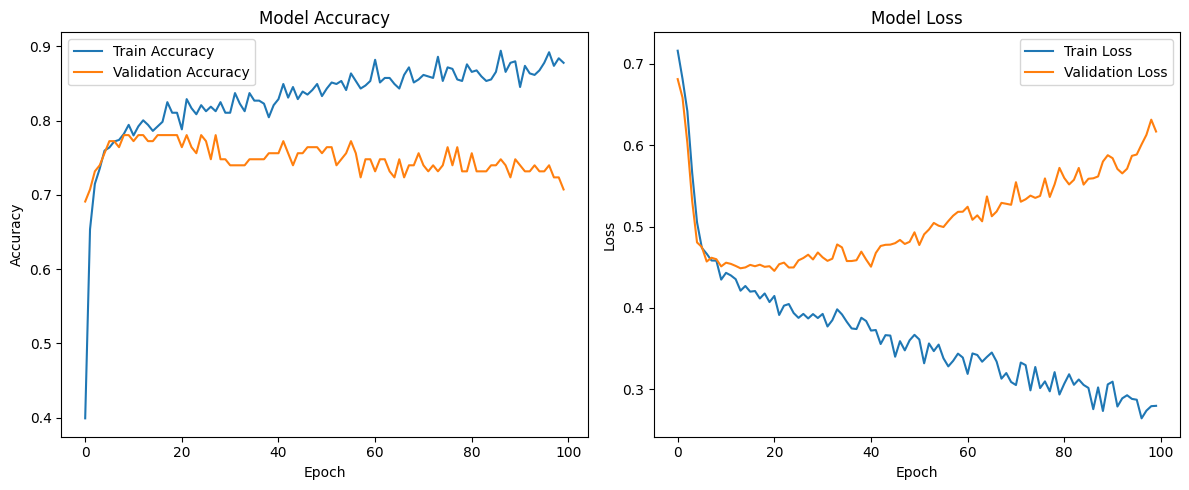

In [49]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


# 2️⃣ Handle missing (zero) values for specific columns
cols_with_invalid_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

# 3️⃣ Split features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 4️⃣ Normalize data (important for deep learning)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6️⃣ Build a 5-layer Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # output layer (binary classification)
])

# 7️⃣ Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 8️⃣ Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# 9️⃣ Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
